In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("data\Bengaluru_House_data.csv")

In [3]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df.drop(['area_type','availability','society','balcony'], axis=1)

In [8]:
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.shape

(13320, 5)

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()

In [12]:
df3.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13246, 5)

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\arunv\AppData\Local\Temp\ipykernel_9516\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [18]:
df3.shape

(13246, 6)

In [19]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3['bhk'] >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


- converting range to a single number

In [24]:
def convert_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_range_to_num('30sqmtr')

In [26]:
df4 = df3.copy()

In [27]:
df4['total_sqft'] = df3['total_sqft'].apply(convert_range_to_num)

In [28]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [29]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [30]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [31]:
df5 = df4.copy()

In [32]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [33]:
df5.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
len(df5.location.unique())

1304

In [35]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [36]:
len(location_stats[location_stats <=10])

1052

In [37]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [38]:
len(df5.location.unique())

1293

In [39]:
df5['location']= df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [40]:
len(df5.location.unique())

242

In [41]:
df5.shape

(13246, 7)

In [42]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


- Some basic understanding of the dataset
- for a given total_sqft home and the no.of bedroom , the sq.ft per bedroom is calculated  must be >300

In [43]:
df5[df5['total_sqft']/df5['bhk'] < 300].head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [44]:
df5.shape

(13246, 7)

In [45]:
df7 = df5[~(df5['total_sqft']/df5['bhk']<300)]

In [46]:
df7.shape

(12502, 7)

In [47]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [48]:
df7.isna().sum()

location           0
size               0
total_sqft        46
bath               0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [49]:
def remove_pps_ouliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index =True)
    return df_out

In [50]:
df8 = remove_pps_ouliers(df7)
df8.shape

(10241, 7)

In [51]:
df8.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

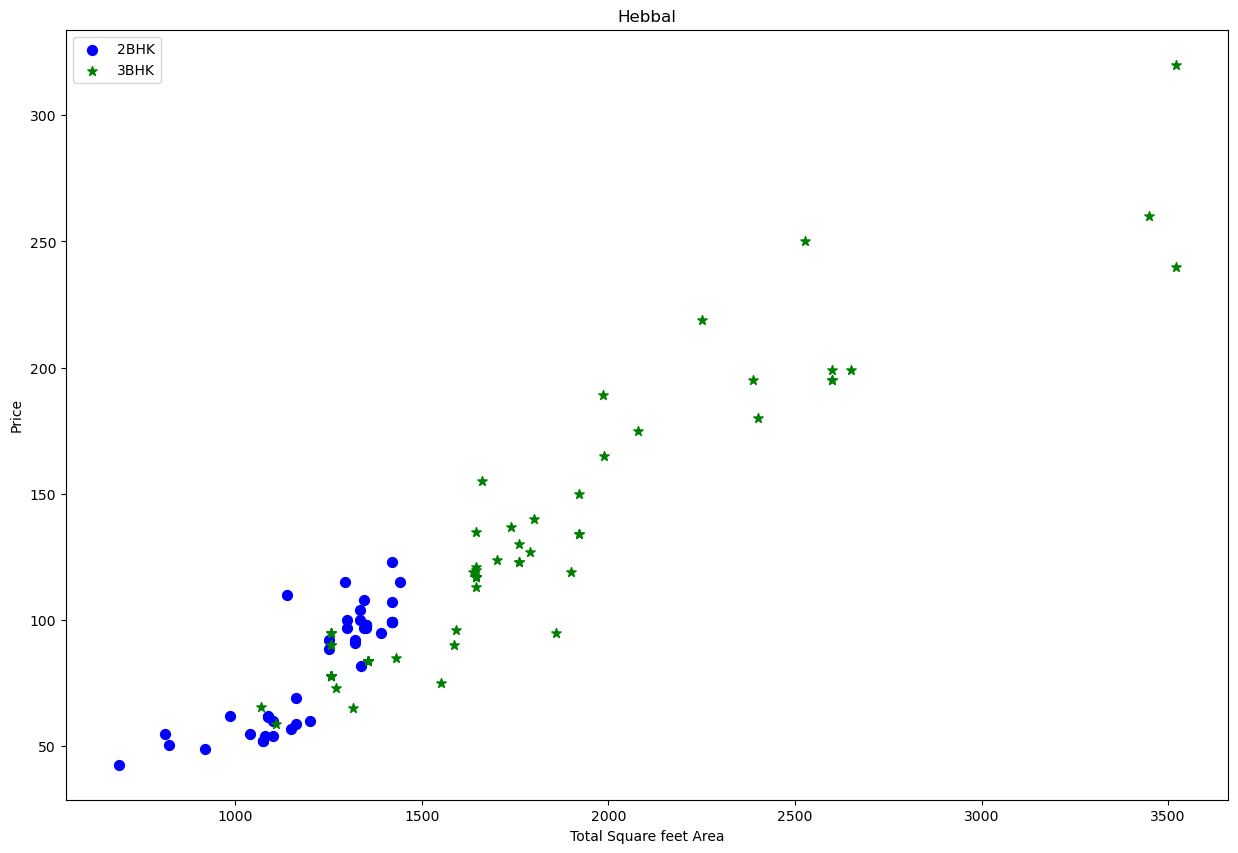

In [52]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color ='blue', label = '2BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker ='*',color ='green', label = '3BHK',s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8, "Hebbal")

We should also remove properties for same location, the price of(for example) 3 bedroom apartment is less than 2 bedroom apartment(with same square ft area). What we will do is for a give location , we will build a dictionary of atats per bhk, i.e.

    {
        '1': {
            'mean':4000,
            'std':2000,
            'count': 34
             }
          '2' :{
          'mean': 4300,
          'std':2300,
          'count':22
          }
      }
      
  Now we can remove those 2 BHK apartments whose price_per_sqt is less than mean price_per_sqt of 1BHK apatment

In [53]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis ='index')

In [54]:
df9 = remove_bhk_outliers(df8)

In [55]:
df9.shape

(7329, 7)

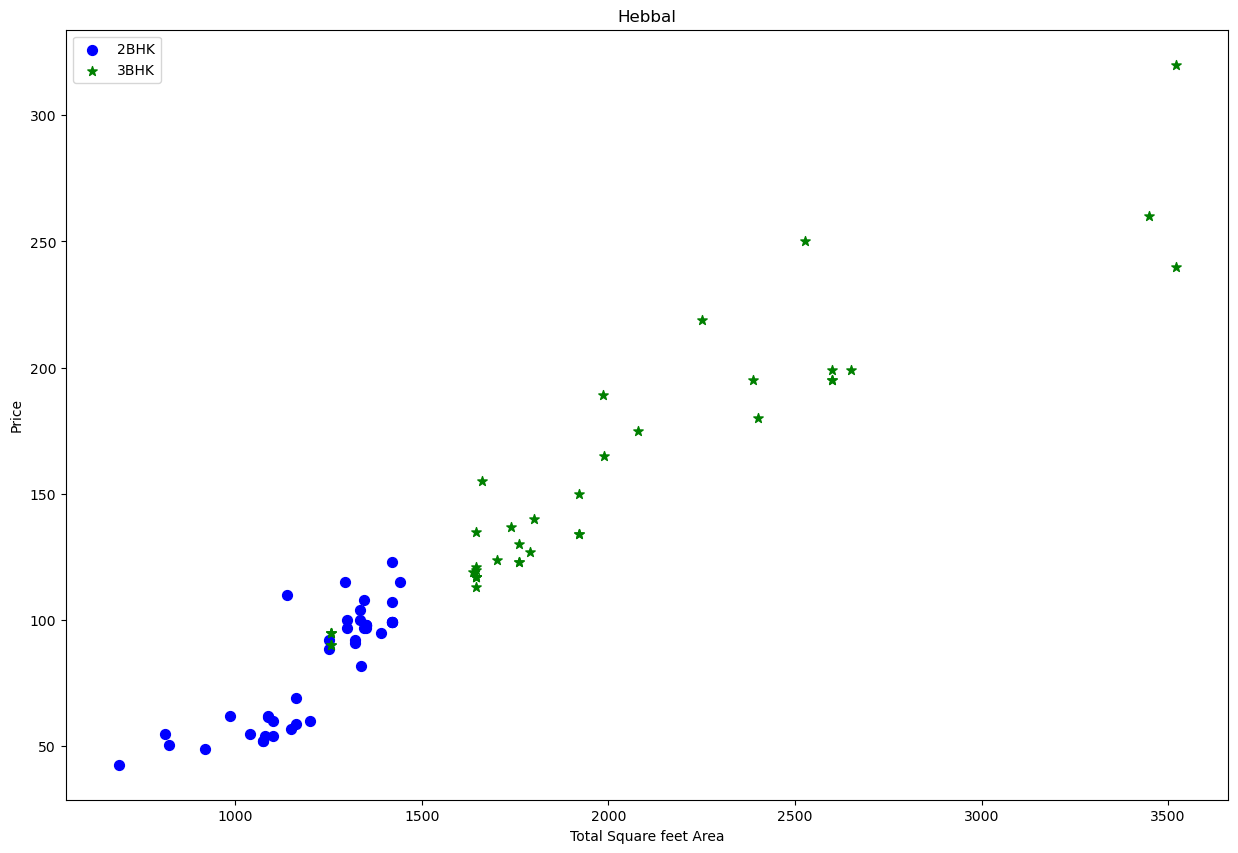

In [56]:
plot_scatter_chart(df9, "Hebbal")

Text(0, 0.5, 'Count')

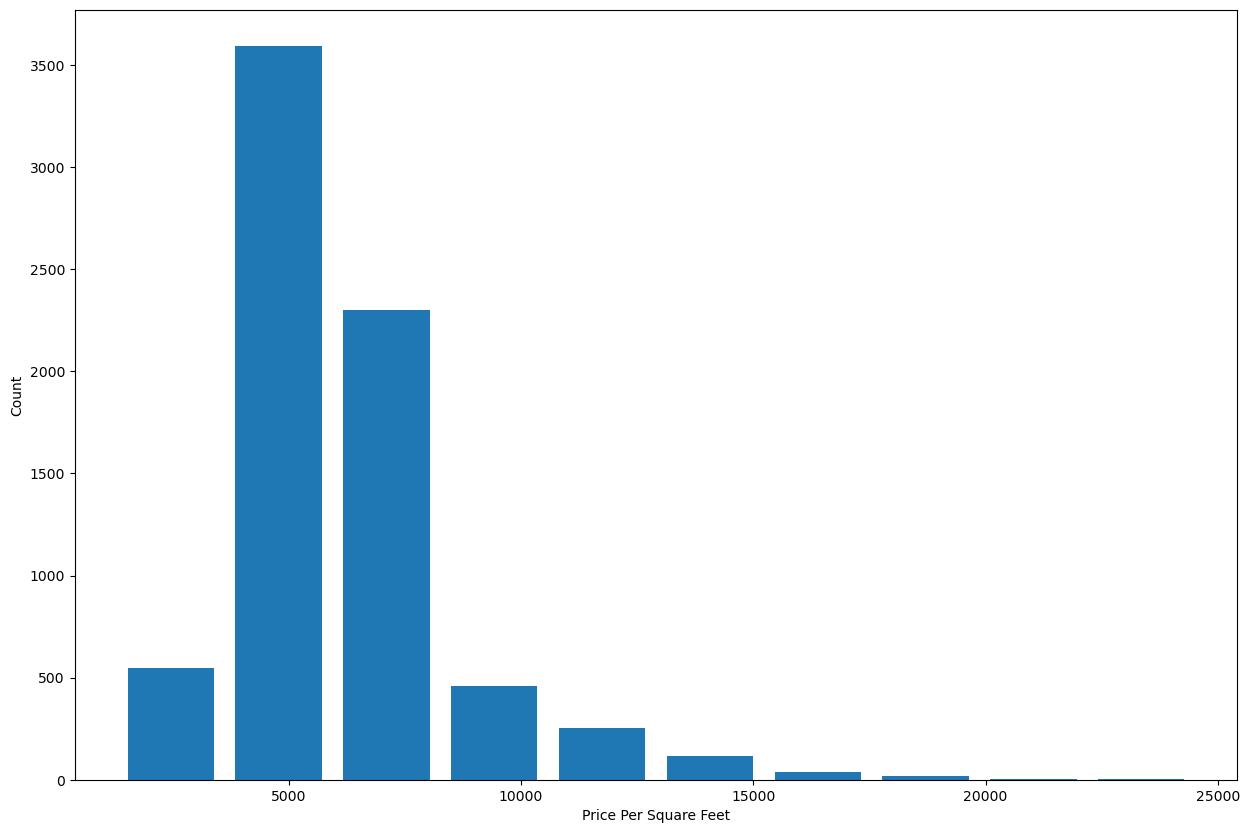

In [57]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df9.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [58]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
df9[df9.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

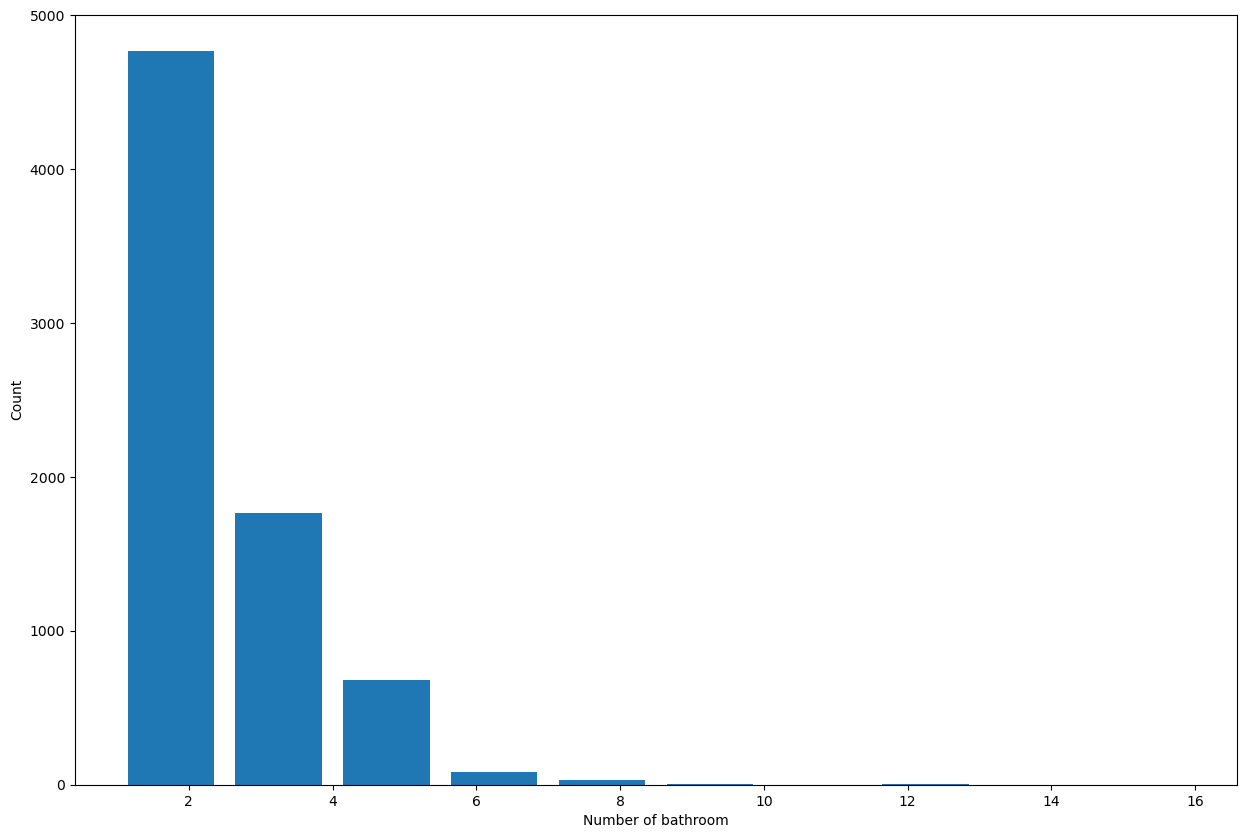

In [60]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df9.bath, rwidth = 0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [61]:
df9[df9.bath > df9.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [62]:
df10 = df9[df9.bath < df9.bhk+2]

In [63]:
df10.shape

(7251, 7)

In [64]:
df10.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [65]:
df11 = df10.drop(['size','price_per_sqft'], axis=1)

In [66]:
df11.shape

(7251, 5)

In [67]:
df11.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df11,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5800, 5), (1451, 5))

In [70]:
X_train.head(2)

,location,total_sqft,bath,price,bhk
1025,Begur Road,1200.0,2.0,46.8,2
3482,Iblur Village,1995.0,3.0,135.0,3


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [73]:
numerical_columns = ["total_sqft","bath","bhk"]
categorical_columns = ["location"]
            
num_pipeline= Pipeline(
    steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())

    ]
)

cat_pipeline=Pipeline(

    steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder()),
    ("scaler",StandardScaler(with_mean=False))
    ]

)

            

preprocessor=ColumnTransformer(
    [
    ("num_pipeline",num_pipeline,numerical_columns),
    ("cat_pipelines",cat_pipeline,categorical_columns)

    ]
)

In [74]:
target_column_name="price"
            
X_train_df=X_train.drop(columns=[target_column_name],axis=1)
y_train_df=X_train[target_column_name]

X_test_df=X_test.drop(columns=[target_column_name],axis=1)
y_test_df=X_test[target_column_name]


In [78]:
X_train_arr=preprocessor.fit_transform(X_train_df)
X_test_arr=preprocessor.transform(X_test_df)

In [92]:
X_train_arr = X_train_arr.toarray()

In [89]:
X_test_arr = X_test_arr.toarray()

In [85]:
y_test_df

3617     79.00
1994    100.00
3221     38.19
9812    270.00
9173     85.00
         ...  
4752     91.00
2432     72.00
6658     58.00
4046     58.00
2459    105.00
Name: price, Length: 1451, dtype: float64

In [90]:
test_arr = np.c_[X_test_arr, np.array(y_test_df)]

In [93]:
train_arr = np.c_[X_train_arr, np.array(y_train_df)]

In [91]:
test_arr

array([[-3.56214445e-01, -4.38405580e-01, -5.32431018e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.90000000e+01],
       [-2.26873648e-02,  6.29529055e-01,  5.70461805e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [-6.55983724e-01, -4.38405580e-01, -5.32431018e-01, ...,
         0.00000000e+00,  0.00000000e+00,  3.81900000e+01],
       ...,
       [-7.19448391e-01, -4.38405580e-01, -1.63532384e+00, ...,
         0.00000000e+00,  0.00000000e+00,  5.80000000e+01],
       [-4.93946276e-01,  6.29529055e-01,  5.70461805e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.80000000e+01],
       [ 4.19431812e-01,  6.29529055e-01,  5.70461805e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.05000000e+02]])

In [95]:
 X_train, y_train, X_test, y_test= (
                train_arr[:,:-1],
                train_arr[:,-1],
                test_arr[:,:-1],
                test_arr[:,-1]
 )

In [96]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [97]:
lg.fit(X_train,y_train)

LinearRegression()

In [98]:
y_pred = lg.predict(X_test)

In [99]:
from sklearn.metrics import r2_score

In [100]:
r_square_score = r2_score(y_test,y_pred)
r_square_score

0.874609554371474

In [101]:
y_test

array([ 79.  , 100.  ,  38.19, ...,  58.  ,  58.  , 105.  ])

In [ ]:

            models = {
                "Random Forest" : RandomForestRegressor(),
                "Decision Tree":DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                # "K-Neighbours Classifier": KNeighborsRegressor(),
                "XGBRegressor": XGBRegressor(),
                "Cat Boosting Regressor": CatBoostRegressor(),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }
            params={
                "Decision Tree": {
                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    # 'splitter':['best','random'],
                    # 'max_features':['sqrt','log2'],
                },
                "Random Forest":{
                    # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                 
                    # 'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Gradient Boosting":{
                    # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate':[.1,.01,.05,.001],
                    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                    # 'criterion':['squared_error', 'friedman_mse'],
                    # 'max_features':['auto','sqrt','log2'],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Linear Regression":{},
                "XGBRegressor":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Cat Boosting Regressor":{
                    'depth': [6,8,10],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'iterations': [30, 50, 100]
                },
                "AdaBoost Regressor":{
                    'learning_rate':[.1,.01,0.5,.001],
                    # 'loss':['linear','square','exponential'],
                    'n_estimators': [8,16,32,64,128,256]
                }
                
            }

            model_report: dict=evaluate_models(X_train=X_train, y_train=y_train,
                                              X_test=X_test, y_test=y_test,
                                              models=models,param=params)
            
            ## To get best model score from dict
            best_model_score = max(sorted(model_report.values()))

            ## To get best model name from dict

            best_model_name = list(model_report.keys())[
                list(model_report.values()).index(best_model_score)
                ]
            
            best_model = models[best_model_name]

            if best_model_score<0.6:
                raise CustomException("No best model found")
            
            logging.info(f"Best found model on both training and testing datatset")

            save_object(
                file_path=self.model_trainer_config.trained_model_file_path,
                obj=best_model
            )

            predicted= best_model.predict(X_test)

            r_square_score = r2_score(y_test,predicted)
            return r_square_score

In [76]:
y_train_df.shape

(5800,)

In [ ]:
X = df11.drop(['price'],axis =1)

In [ ]:
X.head(2)

In [ ]:
y = df11['price']

In [ ]:
y

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

In [ ]:
def get_data_transformer_object(self):
        '''
        This function is responsible for data transformation
        
        '''
        try:
            numerical_columns = ["total_sqft","bath","bhk"]
            categorical_columns = ["location"]
            
            num_pipeline= Pipeline(
                steps=[
                ("imputer",SimpleImputer(strategy="median")),
                ("scaler",StandardScaler())

                ]
            )

            cat_pipeline=Pipeline(

                steps=[
                ("imputer",SimpleImputer(strategy="most_frequent")),
                ("one_hot_encoder",OneHotEncoder()),
                ("scaler",StandardScaler(with_mean=False))
                ]

            )

            logging.info(f"Categorical columns: {categorical_columns}")
            logging.info(f"Numerical columns: {numerical_columns}")

            preprocessor=ColumnTransformer(
                [
                ("num_pipeline",num_pipeline,numerical_columns),
                ("cat_pipelines",cat_pipeline,categorical_columns)

                ]
            )

            return preprocessor
        
        except Exception as e:
            raise CustomException(e,sys)
        
    def initiate_data_transformation(self,train_path,test_path):

        try:
            train_df=pd.read_csv(train_path)
            test_df=pd.read_csv(test_path)

            logging.info("Read train and test data completed")

            logging.info("Obtaining preprocessing object")

            preprocessing_obj=self.get_data_transformer_object()

            target_column_name="price"
            

            input_feature_train_df=train_df.drop(columns=[target_column_name],axis=1)
            target_feature_train_df=train_df[target_column_name]

            input_feature_test_df=test_df.drop(columns=[target_column_name],axis=1)
            target_feature_test_df=test_df[target_column_name]

            logging.info(
                f"Applying preprocessing object on training dataframe and testing dataframe."
            )

            input_feature_train_arr=preprocessing_obj.fit_transform(input_feature_train_df)
            input_feature_test_arr=preprocessing_obj.transform(input_feature_test_df)

            train_arr = np.c_[
                input_feature_train_arr, np.array(target_feature_train_df)
            ]
            test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

In [ ]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

In [ ]:
df12 = pd.concat([df11.drop('location',axis=1), dummies.drop('other', axis=1)], axis =1)
df12.head(3)

In [ ]:
df12.shape

In [ ]:
X = df12.drop('price', axis=1)
X.head(3)

In [ ]:
len(np.zeros(len(X.columns)))

In [ ]:
y = df12.price

In [ ]:
y.head(5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X,y, cv=cv)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def best_model(X,y):
    algos = {
        'linear regression' :{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection':['random','cyclic']
            }
        },
        'decision tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []

    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv , return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params':  gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score','best_params'])

In [ ]:
best_model(X,y)

In [ ]:
X.columns

In [ ]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

In [ ]:
len(np.zeros(len(X.columns)))

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
   
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [ ]:
predict_price('Vishveshwarya Layout',1000,2,2)

In [ ]:
predict_price('1st Phase JP Nagar',1000,3,3)

In [ ]:
predict_price('Indira Nagar',1000,3,3)

In [ ]:
import pickle
with open('bangalore_home_prices.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))